### 보스턴의 집값에 영향을 미치는 요소들을 입력값으로 두고 나오는 집값들이 출력값이다.
### 입력 요소엔 범죄율, 접근성, 흑인수, 저속등층, 찰스강이 보이는가 등 다양한 요소들이 있다. 

### 일반적으로 우리가 공부하는 Y=aX+b에서 Y는 대게 레그레션한(연속적인)값이다. 허나 우리가 원하는 현실의 값들은 주로  yes or no/ red or blue 같이 categorical한 값이기 때문에 우리는  해당 식을 sigmoid 등의 식을 이용해 not linear 하게 만들어준다.

In [1]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### boston_housing.npz 이 파일이 부재해서 진행이 안되는 것 같습니다.

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

data sample의 개수는 404 개 13개는 입력벡터

In [3]:
x_train.shape


(404, 13)

In [4]:
y_train.shape

(404,)

In [5]:
x_test.shape

(102, 13)

In [6]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

(x_train[:,0] 첫번째 팩터 (크라임) 값을 보여줌 / '.' plot을 . 으로 해줌

범죄율이 높아질수록 집값이 떨어지는 걸 볼 수 있다. / 직선 그래프가 아님(not linear)

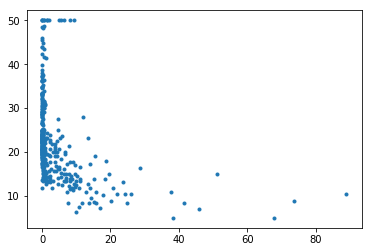

In [7]:
plt.plot(x_train[:,0], y_train, '.')

[:,1] 두번쨰: residential이 많을 수록 집값이 높아지는 경향은 있다. 

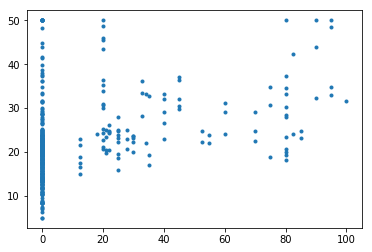

In [8]:
plt.plot(x_train[:,1], y_train, '.')

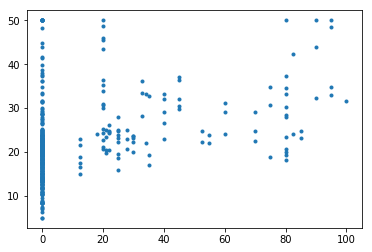

In [9]:
plt.plot(x_train[:,1], y_train, '.')


###  Sequential 한 모델이다. 
### model.add(Dense(1, input_shape=[13])) - [13]:입력이 13개 1: 출력이 1개인 상태
### Dense : fully connected (오밀조밀하게 서로서로 다 연결 돼있는것)


왜 Param# 14 일까? 13이 아니라? +b 값이 있기 때문 (화살표가 14개란 말)

In [24]:
model = Sequential()
model.add(Dense(1, input_shape=[13]))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


model.fit() - 만든 모델을 트레이닝하는 것
epochs=1000 1000번 돌린다.

In [ ]:
돌릴 수록 loss 값이 점점 준다.8000이었던게 20대까지 떨어졌다. 

In [34]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
404/404 [==============================] - 1s 1ms/sample - loss: 50732.1869
Epoch 2/1000
404/404 [==============================] - 0s 77us/sample - loss: 22834.8283
Epoch 3/1000
404/404 [==============================] - 0s 77us/sample - loss: 10085.5723
Epoch 4/1000
404/404 [==============================] - 0s 77us/sample - loss: 4409.1204
Epoch 5/1000
404/404 [==============================] - 0s 77us/sample - loss: 2425.2583
Epoch 6/1000
404/404 [==============================] - 0s 77us/sample - loss: 1683.3135
Epoch 7/1000
404/404 [==============================] - 0s 116us/sample - loss: 1048.9932
Epoch 8/1000
404/404 [==============================] - 0s 77us/sample - loss: 556.3995
Epoch 9/1000
404/404 [==============================] - 0s 77us/sample - loss: 277.3486
Epoch 10/1000
404/404 [==============================] - 0s 77us/sample - loss: 145.1707
Epoch 11/1000
404/404 [==============================] - 0s 116us/sample - loss: 108.8487
Epoch 12/1000
404/4

404/404 [==============================] - 0s 77us/sample - loss: 39.8138
Epoch 186/1000
404/404 [==============================] - 0s 77us/sample - loss: 42.3714
Epoch 187/1000
404/404 [==============================] - 0s 39us/sample - loss: 38.0314
Epoch 188/1000
404/404 [==============================] - 0s 77us/sample - loss: 38.6226
Epoch 189/1000
404/404 [==============================] - 0s 77us/sample - loss: 45.6286
Epoch 190/1000
404/404 [==============================] - 0s 77us/sample - loss: 40.5918
Epoch 191/1000
404/404 [==============================] - 0s 77us/sample - loss: 38.8993
Epoch 192/1000
404/404 [==============================] - 0s 77us/sample - loss: 42.7603
Epoch 193/1000
404/404 [==============================] - 0s 77us/sample - loss: 44.1882
Epoch 194/1000
404/404 [==============================] - 0s 77us/sample - loss: 42.5366
Epoch 195/1000
404/404 [==============================] - 0s 77us/sample - loss: 40.4032
Epoch 196/1000
404/404 [============

404/404 [==============================] - 0s 77us/sample - loss: 36.9931
Epoch 369/1000
404/404 [==============================] - 0s 77us/sample - loss: 40.2069
Epoch 370/1000
404/404 [==============================] - 0s 77us/sample - loss: 30.1885
Epoch 371/1000
404/404 [==============================] - 0s 77us/sample - loss: 40.1542
Epoch 372/1000
404/404 [==============================] - 0s 77us/sample - loss: 33.1890
Epoch 373/1000
404/404 [==============================] - 0s 77us/sample - loss: 37.3246
Epoch 374/1000
404/404 [==============================] - 0s 116us/sample - loss: 35.0371
Epoch 375/1000
404/404 [==============================] - 0s 77us/sample - loss: 35.8764
Epoch 376/1000
404/404 [==============================] - 0s 77us/sample - loss: 39.8948
Epoch 377/1000
404/404 [==============================] - 0s 77us/sample - loss: 36.5126
Epoch 378/1000
404/404 [==============================] - 0s 77us/sample - loss: 34.4202
Epoch 379/1000
404/404 [===========

404/404 [==============================] - 0s 77us/sample - loss: 38.1101
Epoch 461/1000
404/404 [==============================] - 0s 77us/sample - loss: 39.9417
Epoch 462/1000
404/404 [==============================] - 0s 77us/sample - loss: 32.6032
Epoch 463/1000
404/404 [==============================] - 0s 116us/sample - loss: 36.1110
Epoch 464/1000
404/404 [==============================] - 0s 77us/sample - loss: 35.5645
Epoch 465/1000
404/404 [==============================] - 0s 77us/sample - loss: 33.3831
Epoch 466/1000
404/404 [==============================] - 0s 77us/sample - loss: 39.4449
Epoch 467/1000
404/404 [==============================] - 0s 77us/sample - loss: 32.7502
Epoch 468/1000
404/404 [==============================] - 0s 77us/sample - loss: 37.1202
Epoch 469/1000
404/404 [==============================] - 0s 116us/sample - loss: 35.8467
Epoch 470/1000
404/404 [==============================] - 0s 77us/sample - loss: 32.4616
Epoch 471/1000
404/404 [==========

Epoch 643/1000
404/404 [==============================] - 0s 116us/sample - loss: 33.3192
Epoch 644/1000
404/404 [==============================] - 0s 77us/sample - loss: 37.9612
Epoch 645/1000
404/404 [==============================] - 0s 116us/sample - loss: 30.1933
Epoch 646/1000
404/404 [==============================] - 0s 77us/sample - loss: 37.5524
Epoch 647/1000
404/404 [==============================] - 0s 116us/sample - loss: 28.6442
Epoch 648/1000
404/404 [==============================] - 0s 77us/sample - loss: 34.6845
Epoch 649/1000
404/404 [==============================] - 0s 77us/sample - loss: 38.1490
Epoch 650/1000
404/404 [==============================] - 0s 77us/sample - loss: 26.5145
Epoch 651/1000
404/404 [==============================] - 0s 77us/sample - loss: 37.4546
Epoch 652/1000
404/404 [==============================] - 0s 77us/sample - loss: 36.4087
Epoch 653/1000
404/404 [==============================] - 0s 77us/sample - loss: 29.6072
Epoch 654/1000
404

404/404 [==============================] - 0s 77us/sample - loss: 30.5115
Epoch 826/1000
404/404 [==============================] - 0s 77us/sample - loss: 34.3460
Epoch 827/1000
404/404 [==============================] - 0s 77us/sample - loss: 32.4056
Epoch 828/1000
404/404 [==============================] - 0s 39us/sample - loss: 37.0999
Epoch 829/1000
404/404 [==============================] - 0s 77us/sample - loss: 25.9348
Epoch 830/1000
404/404 [==============================] - 0s 77us/sample - loss: 33.6469
Epoch 831/1000
404/404 [==============================] - 0s 39us/sample - loss: 32.7279
Epoch 832/1000
404/404 [==============================] - 0s 77us/sample - loss: 31.9819
Epoch 833/1000
404/404 [==============================] - 0s 77us/sample - loss: 34.5121
Epoch 834/1000
404/404 [==============================] - 0s 77us/sample - loss: 36.6572
Epoch 835/1000
404/404 [==============================] - 0s 77us/sample - loss: 29.1152
Epoch 836/1000
404/404 [============

404/404 [==============================] - 0s 77us/sample - loss: 33.8164
Epoch 918/1000
404/404 [==============================] - 0s 116us/sample - loss: 33.4608
Epoch 919/1000
404/404 [==============================] - 0s 116us/sample - loss: 33.5873
Epoch 920/1000
404/404 [==============================] - 0s 116us/sample - loss: 31.5588
Epoch 921/1000
404/404 [==============================] - 0s 77us/sample - loss: 34.9036
Epoch 922/1000
404/404 [==============================] - 0s 77us/sample - loss: 31.1611
Epoch 923/1000
404/404 [==============================] - 0s 77us/sample - loss: 35.7084
Epoch 924/1000
404/404 [==============================] - 0s 77us/sample - loss: 32.1967
Epoch 925/1000
404/404 [==============================] - 0s 77us/sample - loss: 28.0875
Epoch 926/1000
404/404 [==============================] - 0s 77us/sample - loss: 33.8870
Epoch 927/1000
404/404 [==============================] - 0s 77us/sample - loss: 27.9868
Epoch 928/1000
404/404 [=========

위의 기존 모델에 히든 레이어 넣기
model.add(Dense(10, input_shape=[13])) 히든 레이어을 열개 만들거니까 첫 출력 값은 10개나와야함 (동그라미 10개에 상응하게)
두번쨰 부턴 인풋은 쓸 필요 없다. 전 값의 출력값이 곧 입력값이라.
마지막엔 기존의 출력값과 같게 1개다.

히든 레이어 하나 노드는 열
시험 예)140과 11의 의미 무엇? 처음 입력 13에 y=ax+b 에서 b고려해서 13+1  히든 레이어 10개니까 (출력값 10) 화살표 수는 (13+1)X10
11은 히든레이어의 입력값 (노드)10이니까 거기에 +b 까지 고려해서 10+1 이라 11이다. 마지막 출력값이 1이니까 11X1 
total 140+11=151

In [11]:
model = Sequential()
model.add(Dense(10, input_shape=[13]))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
히든 레이어를 늘려줘도 어차피 linear 한 값이라 loss가 안준다. 떄문에 
relu 같은 not linear 한 값을 넣어줘야 loss를 줄일 수 있을 것. 

In [41]:
model = Sequential()
model.add(Dense(10, input_shape=[13],activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=1000)

### 만든 모델을 평가한다.

In [6]:
model.evaluate(x_test, y_test)

NameError: name 'x_test' is not defined

In [7]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


범죄율이 낮으면 집값이 올라감 
tax가 낮으면 집값이 올라감.
등을 볼 수 있다. 

    plt.subplot(3,5,i+1) - 3x5 의 형태로 plot을 보여줌


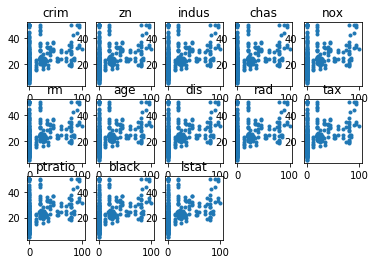

In [22]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

boston_housing = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']

for i in range (13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,1], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

In [17]:
model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

NameError: name 'model' is not defined

### 범죄율과 주거지 비율, 찰스강이 안보이게 되자 집값이 떨어졌음을 확인할 수 있습니다.

In [9]:
model.predict(np.array([3, 3, 20, 0, 1, 1, .2, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[559.05475]], dtype=float32)

indus,rm,dis,rad 등의 값을 긍정적으로 변화시키자 집 값이 올랐음을 확인 할 수 있습니다.

In [10]:
model.predict(np.array([0, 1, 100, 1, 0, 15, .5, 30, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[610.7368]], dtype=float32)